### **평균 제곱 오차**

In [1]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

### **교차엔트로피 오차**

In [2]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [3]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [4]:
(X_train,y_train), (X_test,y_test) = load_mnist(normalize=True,one_hot_label=True)

In [5]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = X_train.shape[0]
batch_size = 10

In [7]:
batch_mask = np.random.choice(train_size,batch_size)
batch_mask

array([31103,    83, 56519, 27053, 56591,  8910,  9108, 29099, 50708,
       10600])

In [8]:
X_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

In [9]:
X_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size

### **미분**

In [11]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### **수치 미분의 예**

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [13]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

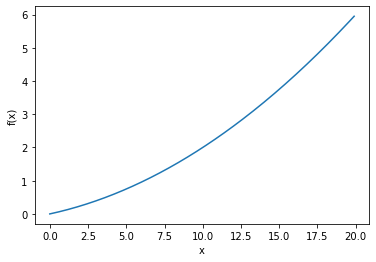

In [14]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [15]:
numerical_diff(function_1,5)

0.1999999999990898

### **편미분**

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [17]:
def function_tmp1(x0):
    return x0*x0 + 2.0 ** 2.0

In [18]:
numerical_diff(function_tmp1,3.0)

6.000000000012662

### **기울기**

In [19]:
def numerical_gradient(f,x):
    h = 1e-4 # 분모가 0이 되는걸 방지
    grad = np.ones_like(x) # x와 형상이 같은 0을 원소로 가진 배열 생성
    
    for idx in range(x.size): # x의 원소의 개수만큼 반복
        tmp_val = x[idx] # 원래의 원소를 tmp_val에 임시 저장
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x) # x[0]**2 + x[1]**2 -> 여기선 x[0]만 미세하게 바뀜
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x) # x[0]**2 + x[1]**2 -> 여기선 x[1]만 미세하게 바뀜
        
        # f(x+h) - f(x-h) / 2*h
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 원래의 값으로 되돌림
    
    return grad

In [20]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

### **경사하강법**

In [21]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

### **필요함수**

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) # np.exp(-x) = exp(-x)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 분자 분모 양쪽에 입력값의 최대 값을 빼준다. 결과는 같다.
    sum_exp_a = np.sum(exp_a) # 오버플로 대책
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y,t):
    delta = 1e-7 # log0이 되는 것을 방지
    return -np.sum(t*np.log(y+delta))

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

### **SimpleNet**

In [31]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # normal_distbution random seed
    def predict(self,x):
        return np.dot(x,self.W) # Hypothesis
    def loss(self,x,t):
        z = self.predict(x) # Hypothesis
        y = softmax(z) # Hypothesis의 결과 값을 softmax 함수를 통해 확률값으로 변환
        loss = cross_entropy_error(y,t) # Cost(cross_entropy)
        return loss

In [32]:
# SimpleNet class 
net = simpleNet()

# dataset
x = np.array([0.6,0.9]) # feature
t = np.array([0,0,1]) # label
print('X:',x)
print('t:',t)

# random weight output
print('init Weight:\n',net.W) 

# Hypothesis
p = net.predict(x) 
print('Hypothesis:',p) 

# Max index 
print("argmax:",np.argmax(x))

# Cost function
cost = net.loss(x,t)
print("Cost:",cost)

X: [0.6 0.9]
t: [0 0 1]
init Weight:
 [[ 0.22196077 -1.40899853  0.92946777]
 [ 0.59099804 -1.63471205 -1.79521999]]
Hypothesis: [ 0.6650747  -2.31663997 -1.05801733]
argmax: 1
Cost: 1.929470459192832


In [33]:
# gradient 내부에서 f(x)를 실행하는데, 그와 일관성을 주기 위한 함수 f
# f = lambda w: net.loss(x,t) 
def f(W): 
    return net.loss(x,t) 

# 각각의 loss 값일때 Gradient를 구한다.
dW = numerical_gradient(f,net.W) 
print(dW)

[[ 0.48811442  0.02475024 -0.51286466]
 [ 0.73217163  0.03712536 -0.76929699]]


### **TwoLayerNet**

In [41]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        # __init__ 클래스를 초기화(초기화 메서드는 클래스를 생성할 때 불리는 메서드)
        # input_size: 입력층 노드 설정
        # hidden_size: 은닉층 노드 설정
        # output_size: 출력층 노드 설정
        # weight_init_std: learning rate
        self.params = {} # 빈 딕셔너리 생성
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size) # Learning rate * W1
        self.params['b1'] = np.zeros(hidden_size) # np.zeros 은닉층 노드의 개수만큼 1차원 원소 0을 생성
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size) # learning rate * W2
        self.params['b2'] = np.zeros(output_size) # np.zeros 출력층 노드의 개수만큼 1차원 원소 0을 생성
        
    def predict(self, x):
        # 가중치 할당 딕셔너리의 키 값을 통해 각각의 value 값을 W1,W2,b1,b2에 할당
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        # Hypothesis
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)       
        return y
    
    def loss(self,x,t):
        # loss (cross_entropy)
        y = self.predict(x)       
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        # Hypothesis
        y = self.predict(x)
        # np.argmax를 통해 각 row의 가장 높은 값의 인덱스를 추출
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        # accuracy
        accuracy = np.sum(y == t) / float(x.shape[0]) 
        return accuracy
    def numerical_gradient(self,x,t):
        # loss 값을 loss_W에 할당
        loss_W = lambda W: self.loss(x,t)
        # 각각의 gradient를 담을 공간 
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads

In [42]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

In [43]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [44]:
x = np.random.rand(100,784) # x_data 100,784 즉, 100개의 데이터 784개의 특성을 지님
y = net.predict(x)
t = np.random.rand(100,10)
print(x.shape)
print(y.shape)
print(t.shape)

(100, 784)
(100, 10)
(100, 10)


In [45]:
# grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.
grads = net.numerical_gradient(x,t)

# 각 매개변수의 기울기
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape) 

(784, 100)
(100,)
(100, 10)
(10,)


In [46]:
import numpy as np
from dataset.mnist import load_mnist

In [47]:
# data import
(x_train,y_train), (x_test,y_test) = load_mnist(normalize=True, one_hot_label=True)

# loss list
train_loss_list = []

# hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [48]:
# training
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = y_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 